O Walmart é uma rede de hipermercados muito famosa por estar presente em 27 países diferentes, com mais de 11 mil lojas. Deixou de atuar no Brasil em 2019 mas, continua atuando fortemente em outros países. Nesse estudo, o Walmart traz uma combinação de dados de 45 lojas incluindo informações de vendas mensais. O Walmart tenta encontrar o impacto de feriados nas vendas das lojas. Os feriados  incluídos nos dados são: Natal, Ação de Graças, Super Bowl, e dia do Trabalho. 

O objetivo desta análise é predizer as vendas das lojas de uma semana. Como há datas, vou analisar se as vendas são impactadas por fatores baseados no tempo. E a pergunta que norteia esse estudo será: como a inclusão de feriados em uma semana aumenta as vendas nas lojas? 

### Importando bibliotecas e dados

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

#Datas
import math
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

### Lendo os arquivos e armazenando em dataframes
#### Reading files and storing in dataframes

In [3]:
df_store = pd.read_csv('./Data/stores.csv')

In [4]:
df_train = pd.read_csv('./Data/train.csv')

In [5]:
df_features = pd.read_csv('./Data/features.csv')

In [6]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
# Concatenando os 3 diferentes datasets
# Merge 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [10]:
# Removendo coluna duplicada: o uso de inplace significa que estamos sobrescrevendo o dataframe
# Removing duplicated column: Use of inplace means we're overwriting the dataframe
df.drop(['IsHoliday_y'], axis = 1, inplace=True)

In [11]:
#Renomeando a coluna
#Renaming the column
df.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace = True)

In [12]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [13]:
#Verifying if dataframe is not corrupted after changes made.
# This function shows (rows,columns)
df.shape 

(421570, 16)

### Lojas e Números de Departamentos
#### Store & Department numbers

In [14]:
# Número de valores distintos
# Number of different values
df['Store'].nunique()

45

In [15]:
df['Dept'].nunique()

81

PT
Agora, eu verifico as médias de vendas semanais para cada loja e departamento a fim de observar valores divergentes para o cenário. 

EN
Now, I check the weekly sales averages for each store and department to observe divergent values for the scenario.

In [16]:
store_dept_table = pd.pivot_table(df,index='Store', columns='Dept', values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [17]:
output = df['Dept'].unique()
print(sorted(output))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


PT
O número das lojas vão de 1 até 45, enquanto o número dos departamentos vão de 1 a 99, mas é possível notar que há alguns valores faltantes como 86, 88, e 89. O número total de departamentos deve ser, portanto, 81.

É possível ver, a partir da tabela pivot, que há médias zeradas e médias negativas. Nesse cenário,é impossível que uma loja/departamento não venda absolutamente nada em uma semana. Os valores 0 e valores negativos não podem aparecer. Logo, será necessário alterar tais valores.

EN
The number of stores ranges from 1 to 45, while the number of departments ranges from 1 to 99, but it is possible to notice that there are some missing values such as 86, 88, and 89. The total number of departments must therefore be 81.

It is possible to see, from the pivot table, that there are zero averages and negative averages. In this scenario, it is impossible for a store/department to sell absolutely nothing in a week. 0 values ​​and negative values ​​cannot appear. Therefore, it will be necessary to change these values.

In [18]:
df.loc[df['Weekly_Sales'] <= 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


PT
Como 1358 linhas representam somente 0,3% do total de linhas (421570), é passível remover tais linhas que contém valores errados de vendas.

EN
Since 1,358 rows represent only 0.3% of the total number of rows (421570), it is possible to remove those rows that contain wrong sales values.

In [19]:
df = df.loc[df['Weekly_Sales'] > 0]

In [20]:
df.shape

(420212, 16)

### Datas
#### Dates

In [21]:
df['Date'].head(5).append(df['Date'].tail(5))

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

PT
Nossos dados vão de 5 de Fevereiro de 2010 a 26 de outubro de 2012

EN
Our data is from February 5, 2010 to October 26, 2012

### Coluna 'isHoliday'
#### 'IsHoliday' column

In [23]:
df_holiday = df.loc[df['IsHoliday'] == True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [24]:
df_not_holiday = df.loc[df['IsHoliday'] == False]
df_not_holiday['Date'].nunique()

133

**PT**
Nem todos os feriados estão nos dados. Sendo eles:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Após 07 de setembro de 2012, os feriados estão na base de teste para previsão. **Quando analisamos os dados, a média de vendas semanais nos feriados é significativamente maior do que nos dias sem feriados**. Nos dados de teste, há 133 semanas sem feriados e 10 semanas com feriados.

Quero ver diferenças entre os tipos de feriados. Então, criei novas colunas para os 4 tipos de feriados e as preencho com valores booleanos. Se a data pertencer a este tipo de feriado, será Verdadeira, se não Falso.

**EN**
All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [26]:
# Datas do Super Bowl na base de teste
# Super Bowl in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [27]:
# Datas do Dia do trabalho na base de teste
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [28]:
# Datas de Ações de Graças na base de teste
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [29]:
# Datas de Natal na base de teste
# Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

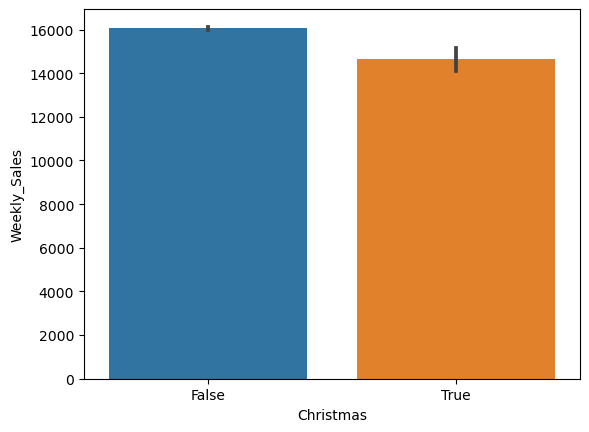

In [30]:
# Feriado de Natal vs não feriado de Natal
# Christmas holiday vs not-Christmas
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) 

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

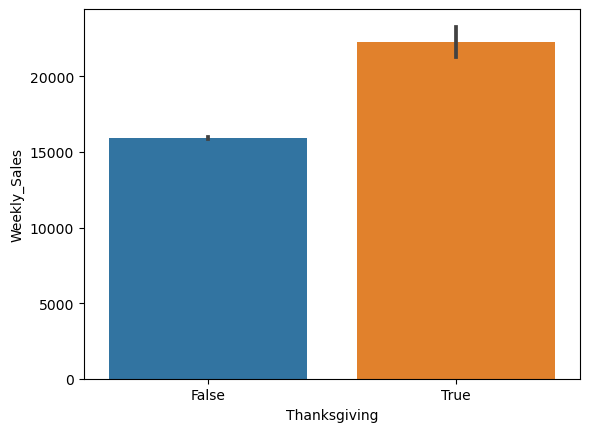

In [33]:
# Feriado de Ações de Graças VS Não feriado de Ações de Graças
# Thanksgiving holiday vs not-thanksgiving
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) 

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

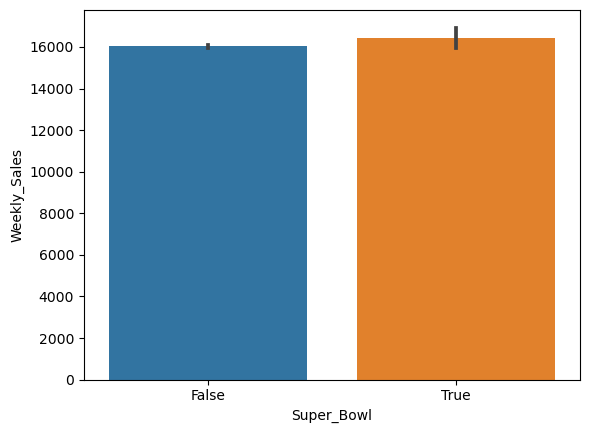

In [31]:
# Feriado Super Bowl VS Não feriado Super Bowl
# Super bowl holiday vs not-super bowl
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) 

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

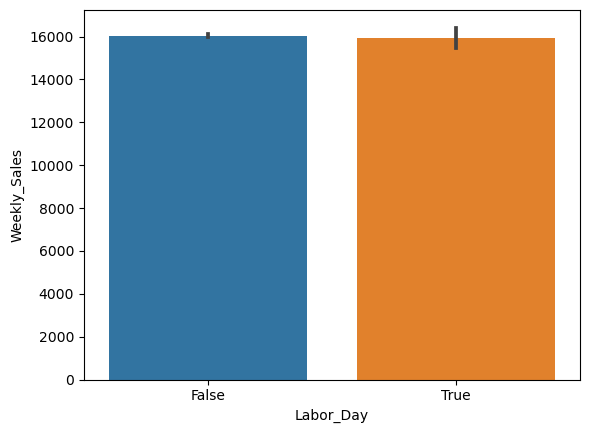

In [32]:
# Feriado Dia do trabalho VS Não Feriado Dia do Trabalho
# Labor day holiday vs not-labor day
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) 

**PT**
É possível ver que, pelos gráficos, o Dia do Trabalho e o Natal não aumentam as vendas médias semanais. Há um efeito positivo nas vendas no Super Bowl, mas a maior diferença está no Dia de Ação de Graças. Podemos inferir que as pessoas geralmente preferem comprar presentes de Natal em um curto período de tempo pré-Natal, então isso pode contribuir para que não se altere as vendas na semana de Natal. Na semana de Ação de Graças há vendas da Black Friday.

**EN**
It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.